# Data Cleaning, Preprocessing & Feature Engineering

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('../data/raw/cardio_train.csv', delimiter=';')
df['age'] = (df['age'] / 365.25).astype(int)
original_size = df.shape
print("Initial dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Initial dataset shape: (70000, 13)

First few rows:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


## 11. DATA CLEANING and PREPROCESSING

In [49]:
#DATA CLEANING (Explanation + Code)
df = df.drop(columns=['id'])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [50]:
import numpy as np
import pandas as pd

# ===============================
# STEP 0: COPY DATA
# ===============================
df_clean = df.copy()
original_size = len(df_clean)

print(f"\nOriginal dataset shape: {df_clean.shape}")

# ===============================
# STEP 1: REMOVE DUPLICATES
# ===============================
dup_count = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates()
print(f"✓ Removed {dup_count} duplicate rows")

# ===============================
# STEP 2: REMOVE NEGATIVE / ZERO BLOOD PRESSURE
# ===============================
neg_bp_mask = (df_clean['ap_hi'] <= 0) | (df_clean['ap_lo'] <= 0)
neg_bp_count = neg_bp_mask.sum()
df_clean = df_clean[~neg_bp_mask]
print(f"✓ Removed {neg_bp_count} records with non-positive BP")

# ===============================
# STEP 3: SYSTOLIC MUST BE > DIASTOLIC
# ===============================
logic_bp_mask = df_clean['ap_hi'] <= df_clean['ap_lo']
logic_bp_count = logic_bp_mask.sum()
df_clean = df_clean[~logic_bp_mask]
print(f"✓ Removed {logic_bp_count} records where systolic ≤ diastolic")

# ===============================
# STEP 4: REMOVE EXTREME BP OUTLIERS
# ===============================
extreme_bp_mask = (df_clean['ap_hi'] > 250) | (df_clean['ap_lo'] > 200)
extreme_bp_count = extreme_bp_mask.sum()
df_clean = df_clean[~extreme_bp_mask]
print(f"✓ Removed {extreme_bp_count} records with extreme BP")

# ===============================
# STEP 5: AGE-AWARE HEIGHT FILTER
# ===============================
invalid_height_mask = (
    ((df_clean['age'] >= 18) & (df_clean['height'] < 130)) |
    (df_clean['height'] > 250)
)
invalid_height_count = invalid_height_mask.sum()
df_clean = df_clean[~invalid_height_mask]
print(f"✓ Removed {invalid_height_count} records with invalid height")

# ===============================
# STEP 6: WEIGHT FILTER
# ===============================
invalid_weight_mask = (
    (df_clean['weight'] < 30) |
    (df_clean['weight'] > 250)
)
invalid_weight_count = invalid_weight_mask.sum()
df_clean = df_clean[~invalid_weight_mask]
print(f"✓ Removed {invalid_weight_count} records with invalid weight")


# ===============================
# SUMMARY
# ===============================
cleaned_size = len(df_clean)
removed = original_size - cleaned_size
removed_pct = (removed / original_size) * 100

print("\n" + "="*60)
print("CLEANING SUMMARY")
print("="*60)
print(f"Original records : {original_size:,}")
print(f"Cleaned records  : {cleaned_size:,}")
print(f"Removed records  : {removed:,} ({removed_pct:.2f}%)")
print(f"Remaining data  : {100 - removed_pct:.2f}%")
print("="*60)

print(f"\nFinal dataset shape: {df_clean.shape}")



Original dataset shape: (70000, 12)
✓ Removed 3186 duplicate rows
✓ Removed 29 records with non-positive BP
✓ Removed 1229 records where systolic ≤ diastolic
✓ Removed 33 records with extreme BP
✓ Removed 89 records with invalid height
✓ Removed 5 records with invalid weight

CLEANING SUMMARY
Original records : 70,000
Cleaned records  : 65,429
Removed records  : 4,571 (6.53%)
Remaining data  : 93.47%

Final dataset shape: (65429, 12)


In [51]:
df_clean.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [52]:
# Step 11 continued: Check for missing values

print("\n" + "="*60)
print("MISSING VALUE ANALYSIS")
print("="*60)

print(df_clean.isnull().sum())
print("\nAny NaNs in dataset?:", df_clean.isna().any().any())



MISSING VALUE ANALYSIS
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Any NaNs in dataset?: False


Data cleaning was performed based on findings from data validation, data quality checks, and EDA. The identifier column was removed, and age was converted from days to years for interpretability. Records with medically implausible blood pressure values and inconsistencies were removed using domain-informed thresholds. Extreme values in height and weight were capped using percentile-based limits to reduce the influence of outliers while preserving rare but valid observations. These steps improved data reliability without introducing bias.

In [53]:
df_clean.shape
df_clean['cardio'].value_counts(normalize=True)


cardio
1    0.507099
0    0.492901
Name: proportion, dtype: float64

POST-CLEANING EDA VERIFICATION


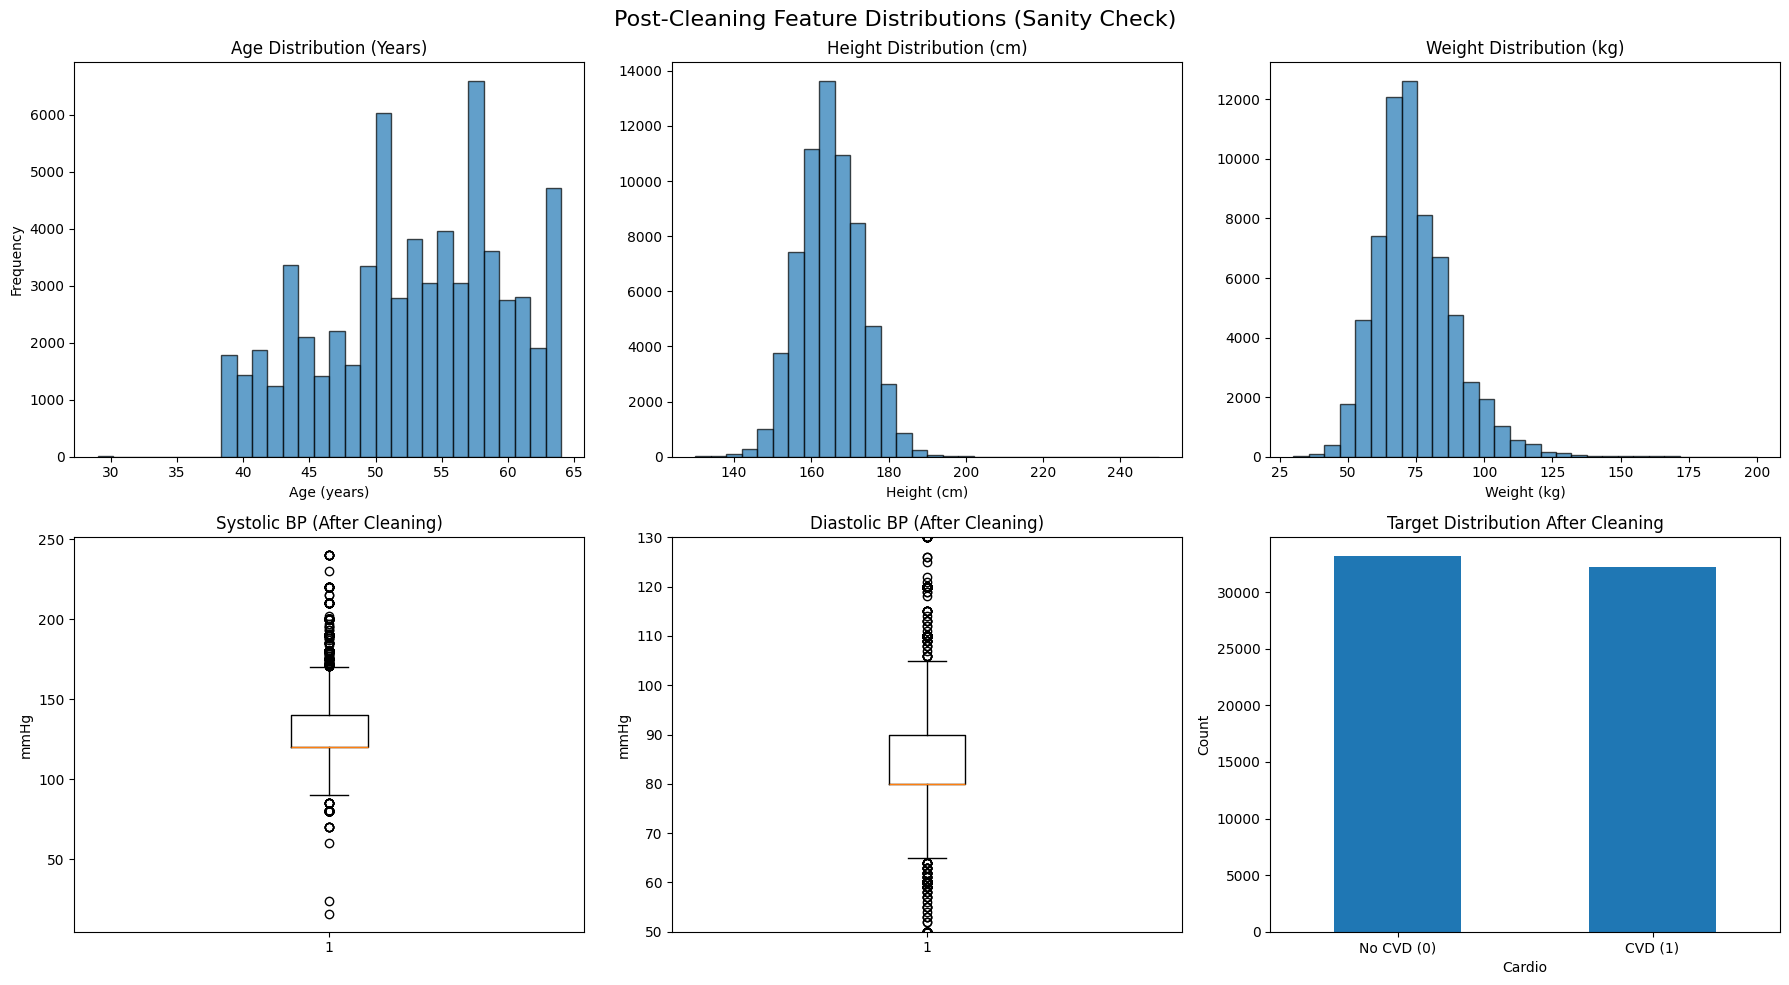

In [54]:
import matplotlib.pyplot as plt

print("=" * 60)
print("POST-CLEANING EDA VERIFICATION")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Post-Cleaning Feature Distributions (Sanity Check)", fontsize=16)

# -----------------------
# Histograms (continuous)
# -----------------------

# Age (years)
axes[0, 0].hist(df_clean['age'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title("Age Distribution (Years)")
axes[0, 0].set_xlabel("Age (years)")
axes[0, 0].set_ylabel("Frequency")

# Height
axes[0, 1].hist(df_clean['height'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_title("Height Distribution (cm)")
axes[0, 1].set_xlabel("Height (cm)")

# Weight
axes[0, 2].hist(df_clean['weight'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 2].set_title("Weight Distribution (kg)")
axes[0, 2].set_xlabel("Weight (kg)")

# -----------------------
# Boxplots (blood pressure)
# -----------------------

# Systolic BP
axes[1, 0].boxplot(df_clean['ap_hi'], vert=True)
axes[1, 0].set_title("Systolic BP (After Cleaning)")
axes[1, 0].set_ylabel("mmHg")

# Diastolic BP
axes[1, 1].boxplot(df_clean['ap_lo'], vert=True)
axes[1, 1].set_title("Diastolic BP (After Cleaning)")
axes[1, 1].set_ylabel("mmHg")
axes[1, 1].set_ylim(50, 130)  # Limit y-axis for better visualization

# -----------------------
# Target balance check
# -----------------------

df_clean['cardio'].value_counts().plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title("Target Distribution After Cleaning")
axes[1, 2].set_xlabel("Cardio")
axes[1, 2].set_ylabel("Count")
axes[1, 2].set_xticklabels(['No CVD (0)', 'CVD (1)'], rotation=0)

plt.tight_layout()
plt.show()


In [55]:
df_clean.corr()['cardio'].sort_values(ascending=False)


cardio         1.000000
ap_hi          0.426318
ap_lo          0.337097
age            0.236362
cholesterol    0.214249
weight         0.173833
gluc           0.081798
gender         0.000540
height        -0.011319
alco          -0.014434
smoke         -0.023981
active        -0.029458
Name: cardio, dtype: float64

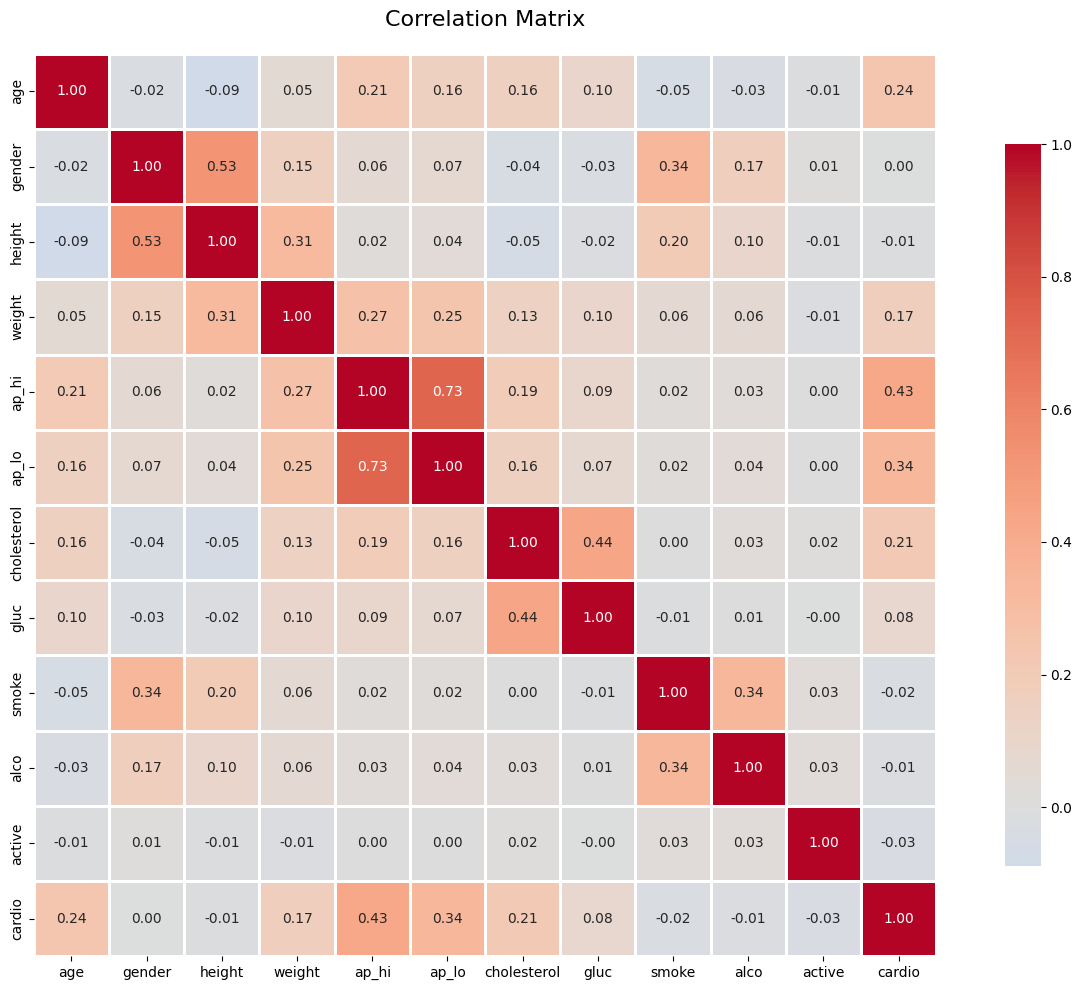


Correlation with Target (cardio):
cardio         1.000000
ap_hi          0.426318
ap_lo          0.337097
age            0.236362
cholesterol    0.214249
weight         0.173833
gluc           0.081798
gender         0.000540
height        -0.011319
alco          -0.014434
smoke         -0.023981
active        -0.029458
Name: cardio, dtype: float64


In [56]:
# Correlation matrix
plt.figure(figsize=(14, 10))

# Calculate correlation
corr = df_clean.corr()

# Create heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation with Target (cardio):")
print(corr['cardio'].sort_values(ascending=False))

In [57]:
df_clean.shape


(65429, 12)

## 13 Feature Engineering

In [58]:

df_fe = df_clean.copy()

# 1. BMI (Body Mass Index)
df_fe['bmi'] = df_fe['weight'] / ((df_fe['height'] / 100) ** 2)
print(" Created BMI feature")

# 2. Pulse Pressure
df_fe['pulse_pressure'] = df_fe['ap_hi'] - df_fe['ap_lo']
print(" Created pulse_pressure feature")

# 3. Mean Arterial Pressure (MAP)
df_fe['MAP'] = (df_fe['ap_hi'] + 2 * df_fe['ap_lo']) / 3
print(" Created mean_arterial_pressure feature")

# 4. Age groups (adult-focused)
df_fe['age_group'] = pd.cut(
    df_fe['age'],
    bins=[30, 40, 50, 60, 100],
    labels=[0, 1, 2, 3]
)
print(" Created age_group feature")

# 5. Blood Pressure Category (safe logic)
df_fe['bp_category'] = np.select(
    [
        (df_fe['ap_hi'] >= 140) | (df_fe['ap_lo'] >= 90),
        (df_fe['ap_hi'] < 90) | (df_fe['ap_lo'] < 60)
    ],
    [1, 2],
    default=0
)
print(" Created bp_category feature")

# 6. Health Risk Score (experimental feature)
df_fe['health_score'] = (
    (df_fe['cholesterol'] - 1) +
    (df_fe['gluc'] - 1) +
    df_fe['smoke'] +
    df_fe['alco'] +
    (1 - df_fe['active'])
)
print(" Created health_score feature")

new_features = [
    'bmi',
    'pulse_pressure',
    'MAP',
    'age_group',
    'bp_category',
    'health_score'
]

print("\nNew features created:", new_features)
print("Total features now:", df_fe.shape[1])

print("\nSample of new features:")
print(df_fe[new_features].head())

print("\nNew feature statistics:")
print(df_fe[['bmi', 'pulse_pressure', 'MAP', 'health_score']].describe())

 Created BMI feature
 Created pulse_pressure feature
 Created mean_arterial_pressure feature
 Created age_group feature
 Created bp_category feature
 Created health_score feature

New features created: ['bmi', 'pulse_pressure', 'MAP', 'age_group', 'bp_category', 'health_score']
Total features now: 18

Sample of new features:
         bmi  pulse_pressure         MAP age_group  bp_category  health_score
0  21.967120              30   90.000000         1            0             0
1  34.927679              50  106.666667         2            1             2
2  23.507805              60   90.000000         2            0             3
3  28.710479              50  116.666667         1            1             0
4  23.011177              40   73.333333         1            0             1

New feature statistics:
                bmi  pulse_pressure           MAP  health_score
count  65429.000000    65429.000000  65429.000000  65429.000000
mean      27.564559       45.632946     96.566359   

In [59]:
df_fe[['bmi', 'pulse_pressure', 'MAP', 'health_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,65429.0,27.564559,5.273211,10.726644,23.875115,26.562500,30.427198,85.779743
pulse_pressure,65429.0,45.632946,11.971905,4.000000,40.000000,40.000000,50.000000,160.000000
MAP,65429.0,96.566359,11.316545,12.000000,93.333333,93.333333,103.333333,186.666667
health_score,65429.0,0.966040,1.224199,0.000000,0.000000,1.000000,2.000000,7.000000


In [60]:
df_fe.shape

(65429, 18)

In [61]:
df_fe.corr()['cardio'].sort_values(ascending=False)

cardio            1.000000
ap_hi             0.426318
MAP               0.407379
bp_category       0.394733
ap_lo             0.337097
pulse_pressure    0.330813
age               0.236362
age_group         0.226864
cholesterol       0.214249
bmi               0.184626
weight            0.173833
health_score      0.160740
gluc              0.081798
gender            0.000540
height           -0.011319
alco             -0.014434
smoke            -0.023981
active           -0.029458
Name: cardio, dtype: float64

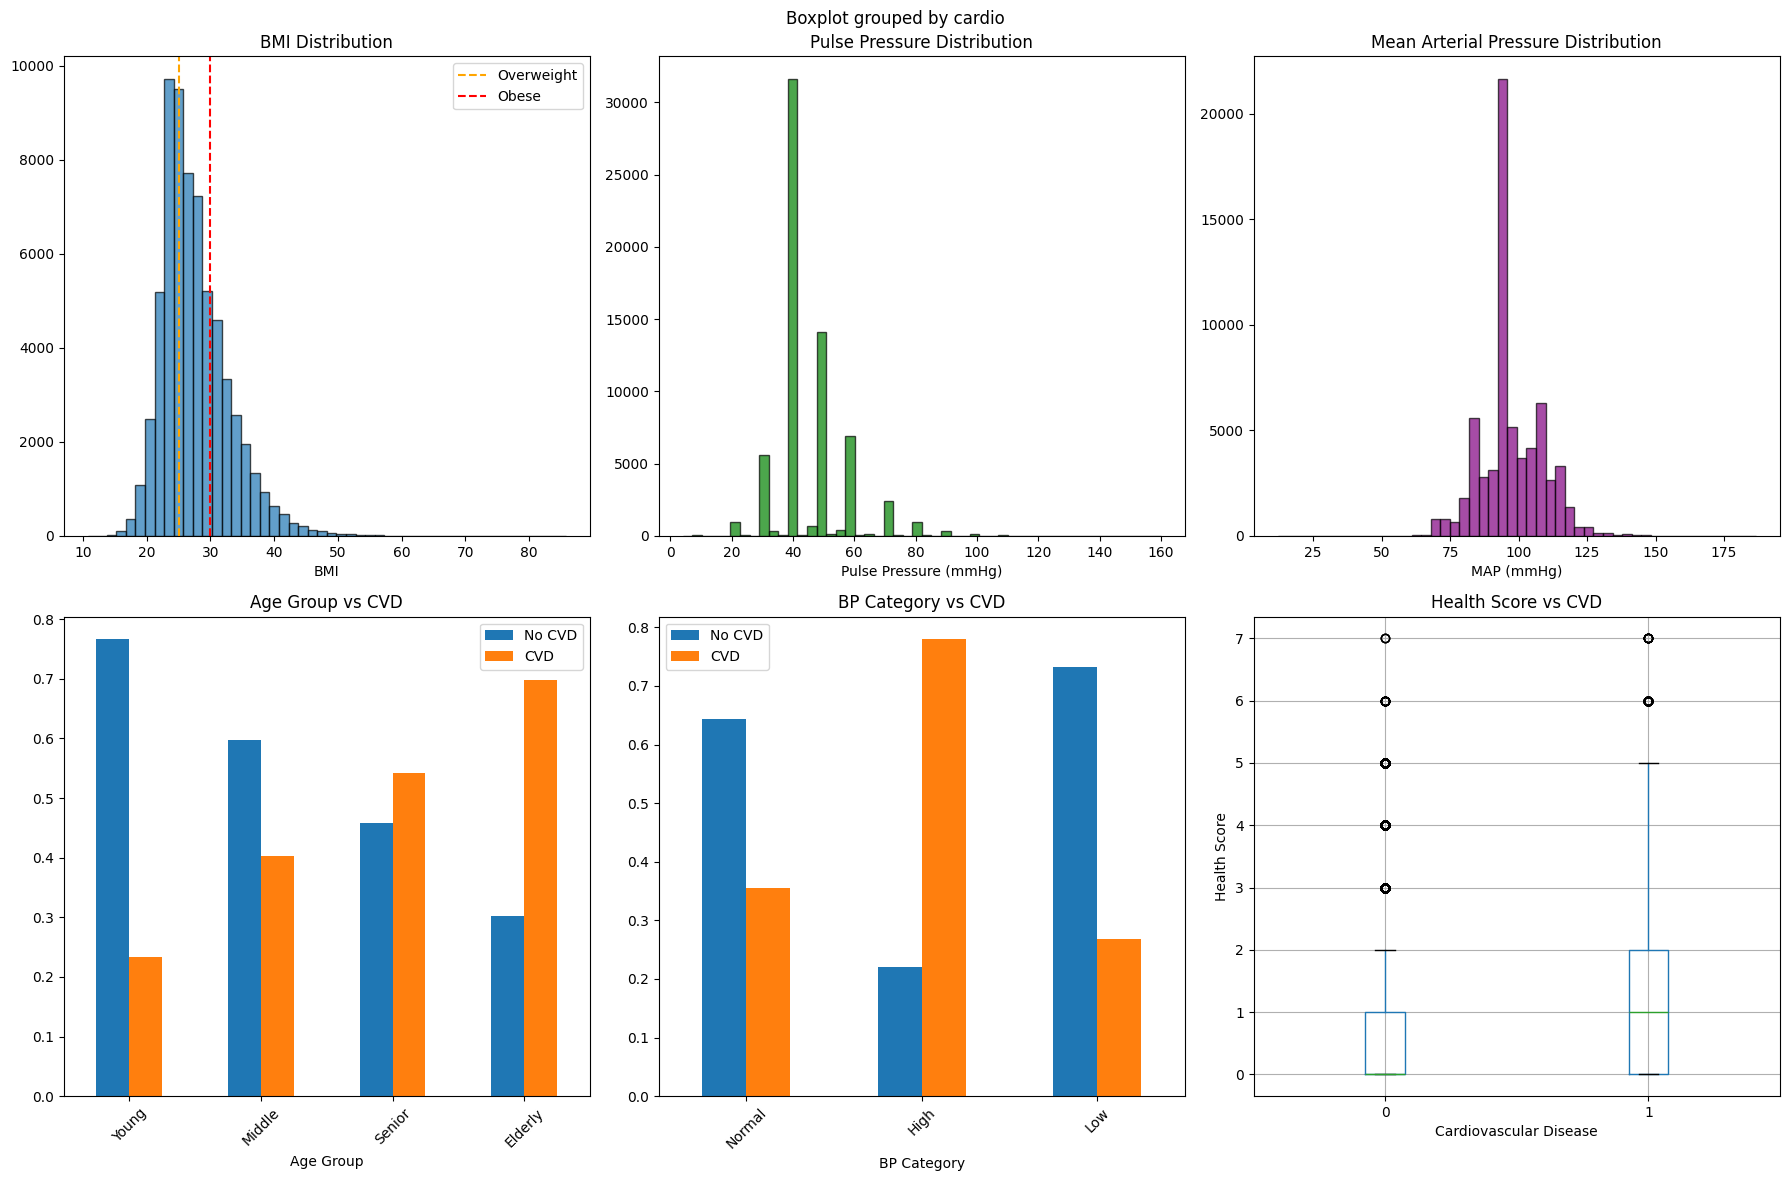

In [62]:
# Visualize new features

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Engineered Features Distribution', fontsize=16)

# BMI
axes[0, 0].hist(df_fe['bmi'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('BMI Distribution')
axes[0, 0].set_xlabel('BMI')
axes[0, 0].axvline(25, color='orange', linestyle='--', label='Overweight')
axes[0, 0].axvline(30, color='red', linestyle='--', label='Obese')
axes[0, 0].legend()

# Pulse Pressure
axes[0, 1].hist(df_fe['pulse_pressure'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('Pulse Pressure Distribution')
axes[0, 1].set_xlabel('Pulse Pressure (mmHg)')

# MAP
axes[0, 2].hist(df_fe['MAP'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[0, 2].set_title('Mean Arterial Pressure Distribution')
axes[0, 2].set_xlabel('MAP (mmHg)')

# Age Group vs Cardio
pd.crosstab(df_fe['age_group'], df_fe['cardio'], normalize='index').plot(
    kind='bar', ax=axes[1, 0], stacked=False
)
axes[1, 0].set_title('Age Group vs CVD')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_xticklabels(['Young', 'Middle', 'Senior', 'Elderly'], rotation=45)
axes[1, 0].legend(['No CVD', 'CVD'])

# BP Category vs Cardio
pd.crosstab(df_fe['bp_category'], df_fe['cardio'], normalize='index').plot(
    kind='bar', ax=axes[1, 1], stacked=False
)
axes[1, 1].set_title('BP Category vs CVD')
axes[1, 1].set_xlabel('BP Category')
axes[1, 1].set_xticklabels(['Normal', 'High', 'Low'], rotation=45)
axes[1, 1].legend(['No CVD', 'CVD'])

# Health Score vs Cardio
df_fe.boxplot(column='health_score', by='cardio', ax=axes[1, 2])
axes[1, 2].set_title('Health Score vs CVD')
axes[1, 2].set_xlabel('Cardiovascular Disease')
axes[1, 2].set_ylabel('Health Score')

plt.tight_layout()
plt.show()

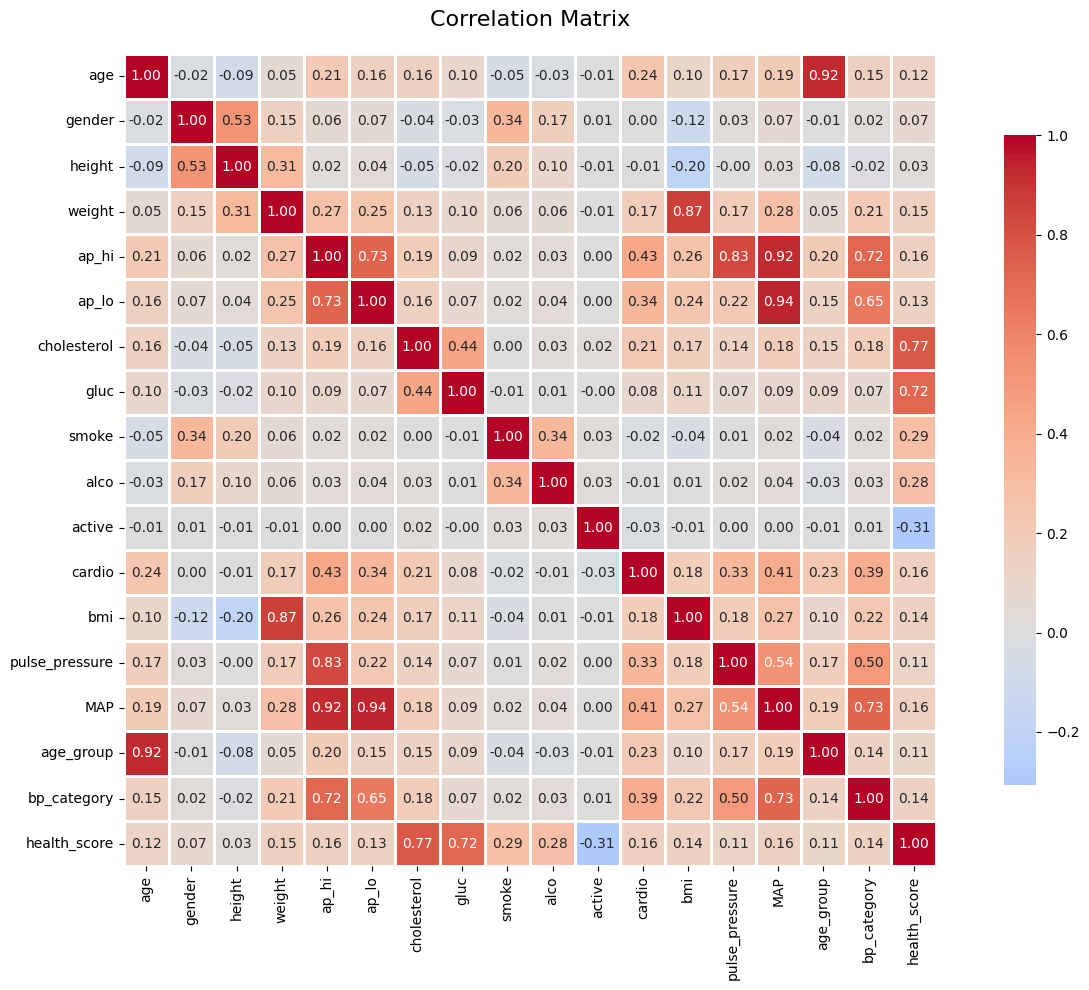


Correlation with Target (cardio):
cardio            1.000000
ap_hi             0.426318
MAP               0.407379
bp_category       0.394733
ap_lo             0.337097
pulse_pressure    0.330813
age               0.236362
age_group         0.226864
cholesterol       0.214249
bmi               0.184626
weight            0.173833
health_score      0.160740
gluc              0.081798
gender            0.000540
height           -0.011319
alco             -0.014434
smoke            -0.023981
active           -0.029458
Name: cardio, dtype: float64


In [63]:
# Correlation matrix
plt.figure(figsize=(14, 10))

# Calculate correlation
corr = df_fe.corr()

# Create heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation with Target (cardio):")
print(corr['cardio'].sort_values(ascending=False))

In [64]:
df_fe.describe().T

,count,mean,std,min,25%,50%,75%,max
age,65429.0,52.814669,6.801043,29.000000,48.000000,53.000000,58.000000,64.000000
gender,65429.0,1.355332,0.478617,1.000000,1.000000,1.000000,2.000000,2.000000
height,65429.0,164.426539,7.967795,130.000000,159.000000,165.000000,170.000000,250.000000
weight,65429.0,74.429334,14.475260,30.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,65429.0,126.988323,17.007074,16.000000,120.000000,120.000000,140.000000,240.000000
ap_lo,65429.0,81.355378,9.759689,1.000000,80.000000,80.000000,90.000000,182.000000
cholesterol,65429.0,1.380779,0.689058,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,65429.0,1.235538,0.581568,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,65429.0,0.092008,0.289040,0.000000,0.000000,0.000000,0.000000,1.000000
alco,65429.0,0.055893,0.229716,0.000000,0.000000,0.000000,0.000000,1.000000


In [65]:
df_fe.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure,MAP,age_group,bp_category,health_score
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30,90.000000,1,0,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50,106.666667,2,1,2
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60,90.000000,2,0,3
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50,116.666667,1,1,0
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40,73.333333,1,0,1


In [66]:
nan_counts = df_fe.isnull().sum()
print(nan_counts)

age               0
gender            0
height            0
weight            0
ap_hi             0
ap_lo             0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
bmi               0
pulse_pressure    0
MAP               0
age_group         4
bp_category       0
health_score      0
dtype: int64


In [70]:
print("="*60)
print("NaN VALUES IN df_fe BY COLUMN")
print("="*60)

nan_counts = df_fe.isnull().sum()
print(nan_counts)

print(f"\nTotal NaN values: {nan_counts.sum()}")
print(f"Percentage of NaN: {(nan_counts.sum() / (df_fe.shape[0] * df_fe.shape[1]) * 100):.2f}%")

# Show columns with NaN values
cols_with_nan = nan_counts[nan_counts > 0]
if len(cols_with_nan) > 0:
    print(f"\nColumns with NaN values:")
    for col, count in cols_with_nan.items():
        pct = (count / df_fe.shape[0]) * 100
        print(f"  {col}: {count} ({pct:.2f}%)")
else:
    print("\nNo NaN values found!")

# Handle NaN in age_group (fill with nearest category)
if df_fe['age_group'].isnull().sum() > 0:
    print(f"\n✓ Filling {df_fe['age_group'].isnull().sum()} NaN values in age_group")
    df_fe['age_group'] = df_fe['age_group'].fillna(3)  # Fill with 3 (Elderly category)

NaN VALUES IN df_fe BY COLUMN
age               0
gender            0
height            0
weight            0
ap_hi             0
ap_lo             0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
bmi               0
pulse_pressure    0
MAP               0
age_group         4
bp_category       0
health_score      0
dtype: int64

Total NaN values: 4
Percentage of NaN: 0.00%

Columns with NaN values:
  age_group: 4 (0.01%)

✓ Filling 4 NaN values in age_group


In [71]:
df_fe['age_group']= df_fe['age_group'].astype(int)

In [72]:
print("="*60)
print("NaN VALUES IN df_fe BY COLUMN")
print("="*60)

nan_counts = df_fe.isnull().sum()
print(nan_counts)

print(f"\nTotal NaN values: {nan_counts.sum()}")
print(f"Percentage of NaN: {(nan_counts.sum() / (df_fe.shape[0] * df_fe.shape[1]) * 100):.2f}%")

# Show columns with NaN values
cols_with_nan = nan_counts[nan_counts > 0]
if len(cols_with_nan) > 0:
    print(f"\nColumns with NaN values:")
    for col, count in cols_with_nan.items():
        pct = (count / df_fe.shape[0]) * 100
        print(f"  {col}: {count} ({pct:.2f}%)")
else:
    print("\nNo NaN values found!")

# Handle NaN in age_group (fill with nearest category)
if df_fe['age_group'].isnull().sum() > 0:
    print(f"\n✓ Filling {df_fe['age_group'].isnull().sum()} NaN values in age_group")
    df_fe['age_group'] = df_fe['age_group'].fillna(3)  # Fill with 3 (Elderly category)

NaN VALUES IN df_fe BY COLUMN
age               0
gender            0
height            0
weight            0
ap_hi             0
ap_lo             0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
bmi               0
pulse_pressure    0
MAP               0
age_group         0
bp_category       0
health_score      0
dtype: int64

Total NaN values: 0
Percentage of NaN: 0.00%

No NaN values found!


## 14. Feature Selection
What feature selection is 

* Feature selection is model-aware.

* Linear models → reduce redundancy

* Tree models → tolerate redundancy

In [73]:
df_fe.describe().T

,count,mean,std,min,25%,50%,75%,max
age,65429.0,52.814669,6.801043,29.000000,48.000000,53.000000,58.000000,64.000000
gender,65429.0,1.355332,0.478617,1.000000,1.000000,1.000000,2.000000,2.000000
height,65429.0,164.426539,7.967795,130.000000,159.000000,165.000000,170.000000,250.000000
weight,65429.0,74.429334,14.475260,30.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,65429.0,126.988323,17.007074,16.000000,120.000000,120.000000,140.000000,240.000000
ap_lo,65429.0,81.355378,9.759689,1.000000,80.000000,80.000000,90.000000,182.000000
cholesterol,65429.0,1.380779,0.689058,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,65429.0,1.235538,0.581568,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,65429.0,0.092008,0.289040,0.000000,0.000000,0.000000,0.000000,1.000000
alco,65429.0,0.055893,0.229716,0.000000,0.000000,0.000000,0.000000,1.000000


In [74]:
print("=" * 70)
print("STEP 14: FEATURE SELECTION")
print("=" * 70)

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# -------------------------------------------------------
# 1. START FROM FEATURE-ENGINEERED DATA
# -------------------------------------------------------

df_fs = df_fe.copy()
print(f"Initial shape (after feature engineering): {df_fs.shape}")

# -------------------------------------------------------
# 2. SAFETY STEP: CAP EXTREME BMI VALUES
# -------------------------------------------------------

df_fs['bmi'] = df_fs['bmi'].clip(upper=60)
print("✓ BMI capped at upper limit = 60")

# -------------------------------------------------------
# 3. BASELINE FEATURE SELECTION (MODEL-AWARE)
# Linear model safe (Logistic Regression)
# -------------------------------------------------------

baseline_features = [
    'age',
    'gender',
    'height',
    'bmi',          # preferred over weight
    'ap_hi',
    'ap_lo',
    'cholesterol',
    'gluc',
    'smoke',
    'alco',
    'active'
]

X = df_fs[baseline_features]
y = df_fs['cardio']

print("\nBaseline features selected:")
for f in baseline_features:
    print(" -", f)

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

# -------------------------------------------------------
# 4. RANDOM FOREST FEATURE IMPORTANCE (SUPPORTING ONLY)
# -------------------------------------------------------

X_rf_train, _, y_rf_train, _ = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_rf_train, y_rf_train)

feature_importance = (
    pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    })
    .sort_values(by='importance', ascending=False)
)

print("\nRandom Forest Feature Importance (supporting evidence):")
print(feature_importance)

# -------------------------------------------------------
# 5. FINAL FEATURE-SELECTED DATASET (FREEZE IT)
# -------------------------------------------------------

df_final = df_fs[baseline_features + ['cardio']].copy()

print("\nFinal feature-selected dataset shape:")
print(df_final.shape)

print("\n✓ Feature Selection completed successfully.")


STEP 14: FEATURE SELECTION
Initial shape (after feature engineering): (65429, 18)
✓ BMI capped at upper limit = 60

Baseline features selected:
 - age
 - gender
 - height
 - bmi
 - ap_hi
 - ap_lo
 - cholesterol
 - gluc
 - smoke
 - alco
 - active

X shape: (65429, 11)
y shape: (65429,)

Random Forest Feature Importance (supporting evidence):
        feature  importance
3           bmi    0.286031
4         ap_hi    0.182175
2        height    0.174419
0           age    0.159674
5         ap_lo    0.087729
6   cholesterol    0.040059
7          gluc    0.019133
1        gender    0.018081
10       active    0.015090
8         smoke    0.009506
9          alco    0.008103

Final feature-selected dataset shape:
(65429, 12)

✓ Feature Selection completed successfully.


In [75]:
# Save the final feature-selected dataset
import os

# Create processed data directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Save to CSV
df_final.to_csv('../data/processed/cardio_processed.csv', index=False)

print("="*60)
print("FINAL DATASET SAVED")
print("="*60)
print(f"Saved to: ../data/processed/cardio_processed.csv")
print(f"Shape: {df_final.shape}")
print(f"\nColumns: {list(df_final.columns)}")


FINAL DATASET SAVED
Saved to: ../data/processed/cardio_processed.csv
Shape: (65429, 12)

Columns: ['age', 'gender', 'height', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [76]:
print(df_fe['height'].max())
print(df_fe['height'].min())
print(df_fe['weight'].max())
print(df_fe['weight'].min())

250
130
200.0
30.0


In [77]:
df_fe[['height', 'weight', 'bmi']].head()

,height,weight,bmi
0,168,62.0,21.967120
1,156,85.0,34.927679
2,165,64.0,23.507805
3,169,82.0,28.710479
4,156,56.0,23.011177


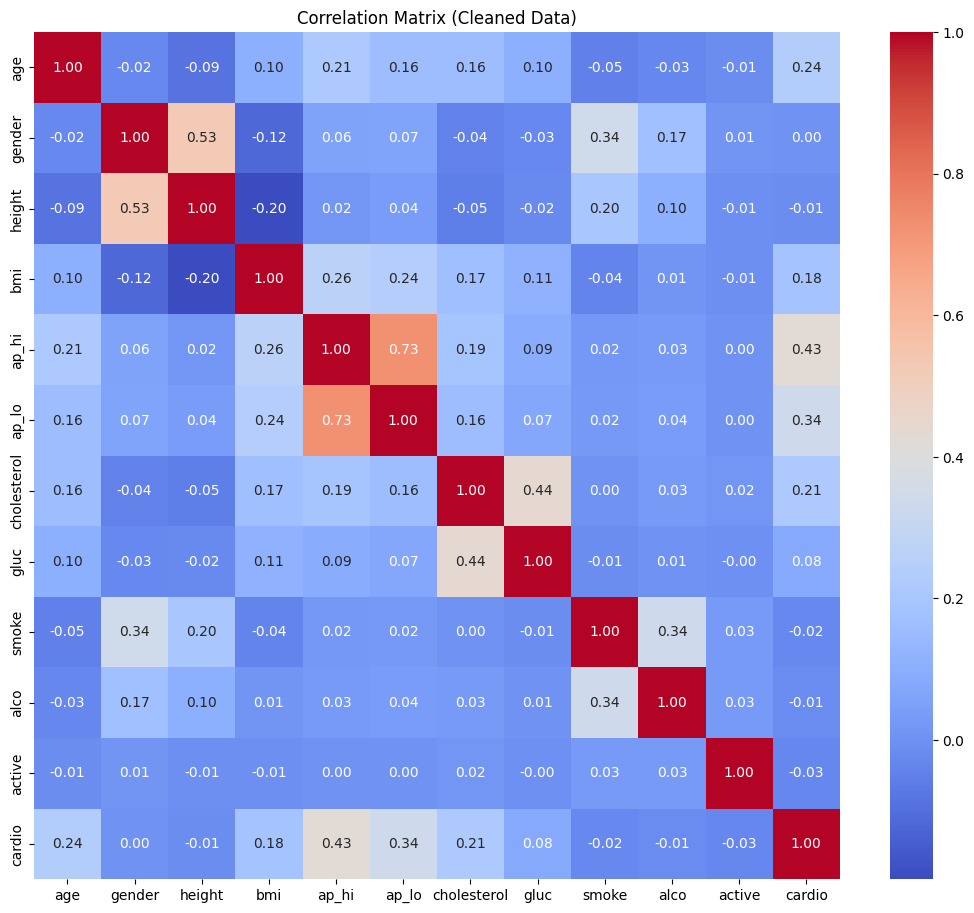

In [83]:
plt.figure(figsize=(13, 11))
numeric_df = df_final.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Cleaned Data)")
plt.show()